Blog: https://medium.com/@kunlun.liu/amazon-employee-access-challenge-4e522abe3f46
Kaggle Link: https://www.kaggle.com/c/amazon-employee-access-challenge/submissions?sortBy=date&group=all&page=1

<img style="float: right;" src="kscore.png">

In [2]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV,RandomizedSearchCV

In [3]:
#read in train and test data set
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

y = train["ACTION"] #save action for target

In [4]:
#remove action for training set
train.pop("ACTION")

train.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [5]:
#remove id for testing set
test.pop("id")

test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425


# Train LogisticRegression Model by One Hot Encoded Data

In [5]:
#combine train and test vertically 
all_data = pd.concat([train, test],axis=0)
print("The all_data size is : {} ".format(all_data.shape))

# one hot encoding for all columns
all_data_dummies = pd.get_dummies(all_data, columns=all_data.columns, drop_first=True) #one hot encoding
print("The all_data_dummies size is : {} ".format(all_data_dummies.shape))

The all_data size is : (91690, 9) 
The all_data_dummies size is : (91690, 16952) 


In [6]:
#Split combined data set
print("The target size is : {} ".format(y.shape))

lr_train = all_data_dummies.iloc[:y.shape[0]]
lr_test = all_data_dummies.iloc[y.shape[0]:]

print("The  new_train size is : {} ".format(lr_train.shape))
print("The  new_test size is : {} ".format(lr_test.shape))

The target size is : (32769,) 
The  new_train size is : (32769, 16952) 
The  new_test size is : (58921, 16952) 


In [7]:
#Eliminate umimportant features and select the best 8000 features

#featureSelector = SelectKBest(score_func=f_regression,k=8000)
#featureSelector = featureSelector.fit(lr_train,y)

#lr_train = featureSelector.transform(lr_train)
#lr_test = featureSelector.transform(lr_test)

#lr_train.shape

In [8]:
lr = LogisticRegression(random_state=333,C=0.99,class_weight="balanced",penalty="l1")#random_state=123, penalty="l1")


#print(cross_val_score(lr, lr_train,y,cv=5,scoring='roc_auc').mean())

In [9]:
#split data for roc_curve
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_train, y, test_size=0.4)

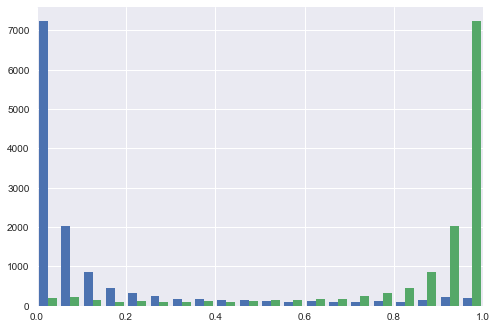

In [10]:
lr.fit(lr_X_train,lr_y_train)
lr_pred_proba = lr.predict_proba(lr_X_test)

plt.hist(lr_pred_proba,bins=20)
plt.xlim([0.0,1.0])

plt.show()

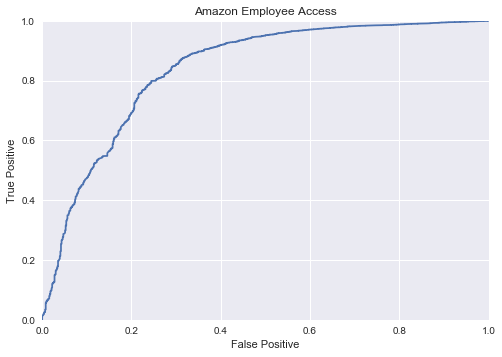

In [11]:
fpr, tpr, thresholds = roc_curve(lr_y_test.values,lr_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title("Amazon Employee Access")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.grid(True)
plt.show()

# Train RandomFroest

In [6]:
#remove ROLE_CODE since it is redundant

train.pop("ROLE_CODE")
test.pop("ROLE_CODE")

#check the numbers of samples and features
print("The train data size after removing is : {} ".format(train.shape))
print("The target size is : {} ".format(y.shape))
print("The test data size after removing is : {} ".format(test.shape))

The train data size after removing is : (32769, 8) 
The target size is : (32769,) 
The test data size after removing is : (58921, 8) 


In [7]:
rf_all_data = pd.concat([train, test],axis=0)
print("The all_data size is : {} ".format(rf_all_data.shape))

The all_data size is : (91690, 8) 


In [8]:
#for each distict value in each column add a column includes its frenquency
def add_counts(data):
    for col in data.columns: 
        count = data[col].value_counts() # returns a series of counts for each category.
        data['count_'+col] = data[col].replace(count)
    return data

train = add_counts(rf_all_data)

In [9]:
#Split combined data set
print("The target size is : {} ".format(y.shape))

rf_train = rf_all_data.iloc[:y.shape[0]]
rf_test = rf_all_data.iloc[y.shape[0]:]

print("The  new_train size is : {} ".format(rf_train.shape))
print("The  new_test size is : {} ".format(rf_test.shape))

The target size is : (32769,) 
The  new_train size is : (32769, 16) 
The  new_test size is : (58921, 16) 


In [16]:
rf = RandomForestClassifier(criterion="gini",
                           n_estimators=300,#250
                            min_samples_split=9,
                            min_samples_leaf=3,
                            max_features=0.5,
                           random_state=66,
                           n_jobs=-1)

#print(cross_val_score(rf, rf_train.values,y,cv=5,scoring='roc_auc').mean())
#0.873761375477

In [17]:
#hyper paramters tunning fro random forest

#params = {"n_estimators":[300,350],
         #"min_samples_split":[6,9,12]}


#grid = GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring = 'roc_auc')
#grid.fit(train,y)

#print(grid.best_score_)
#print(grid.best_params_)
#print(grid.best_estimator_)

In [10]:
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_train, y, test_size=0.4)

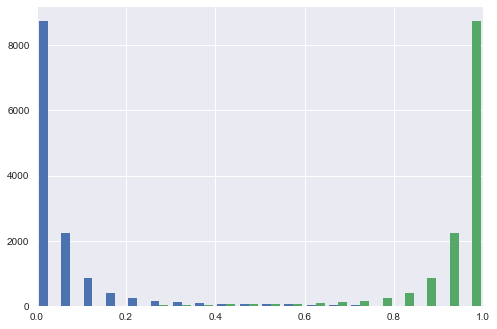

In [19]:
rf.fit(rf_X_train,rf_y_train)
rf_pred_proba = rf.predict_proba(rf_X_test)

plt.hist(rf_pred_proba,bins=20)
plt.xlim([0.0,1.0])

plt.show()

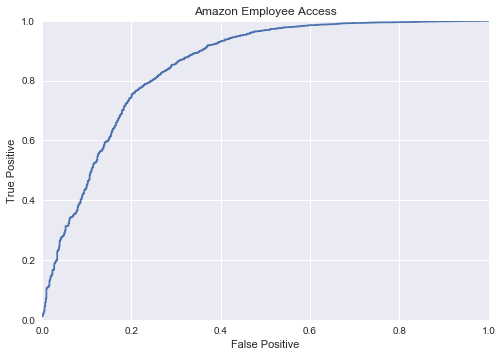

In [20]:
fpr, tpr, thresholds = roc_curve(rf_y_test.values,rf_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title("Amazon Employee Access")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.grid(True)
plt.show()

# Try Gradient Boosting

In [11]:
gbc_train = rf_train
gbc_test = rf_test

In [12]:
# Standardizing input data

from sklearn.preprocessing import StandardScaler 
SS = StandardScaler(copy=False, with_mean=True, with_std=True) 
SS.fit_transform(gbc_train)
SS.fit_transform(gbc_test)


array([[ 1.16802002,  1.3113764 ,  0.09720754, ...,  0.08437938,
        -0.49106582, -0.34020656],
       [ 0.03737748, -0.63553629,  0.08628703, ..., -0.73172713,
        -0.54167847, -0.695597  ],
       [ 1.06946472, -0.69201601,  0.08628703, ..., -0.77347051,
        -0.49179302, -0.95396075],
       ..., 
       [-0.00361061, -0.58609161,  0.08628703, ..., -0.68458994,
        -0.47724915,  1.48059755],
       [-1.1377232 , -0.5131778 ,  0.08628703, ...,  2.01770755,
         2.06501849,  1.48059755],
       [ 0.16588789, -0.64863799,  0.08628703, ..., -0.67239525,
        -0.40278456, -0.30585014]])

In [14]:
gbc = GradientBoostingClassifier(n_estimators=3000, min_samples_split=9)


#gbc.fit(train,y)
#print(cross_val_score(gbc, gbc_train,y,cv=5,scoring='roc_auc').mean())

In [15]:
#param_dist = {"n_estimators":[2000,3000],
             #"min_samples_split":[9,7]}                          


# run randomized search
#n_iter_search = 3 
#random_search = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=n_iter_search,scoring='roc_auc')

#random_search.fit(gbc_train, y)

#print(random_search.best_score_)
#print(random_search.best_params_)

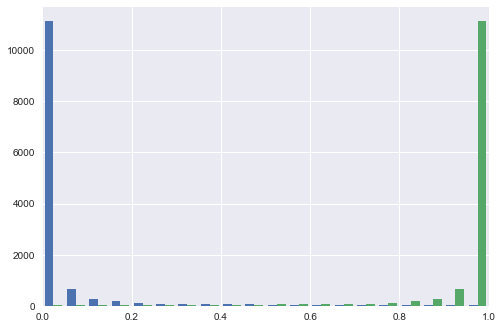

In [17]:
#gbc.fit(rf_X_train,rf_y_train)
#gbc_pred_proba = gbc.predict_proba(rf_X_test)

plt.hist(gbc_pred_proba,bins=20)
plt.xlim([0.0,1.0])

plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(rf_y_test.values,gbc_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title("Amazon Employee Access")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.grid(True)
plt.show()

# Combined Model

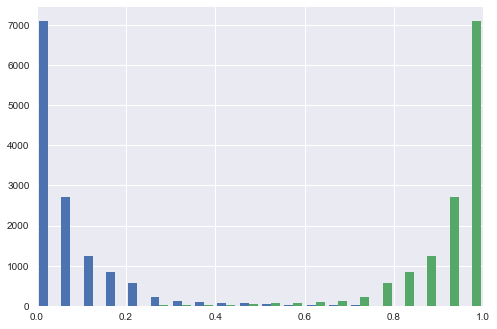

In [27]:
combine_pred_proba = 0.2*lr_pred_proba + 0.8*rf_pred_proba #+ gbm_pred_proba + gbc_pred_proba)/4


plt.hist(combine_pred_proba,bins=20)
plt.xlim([0.0,1.0])

plt.show()

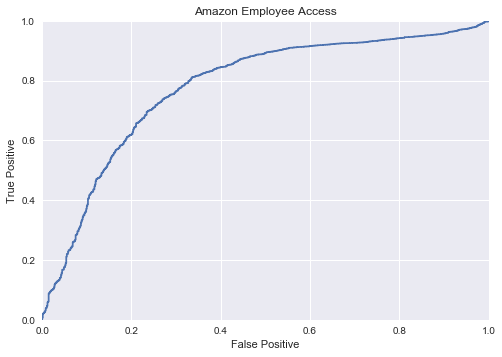

In [28]:
fpr, tpr, thresholds = roc_curve(lr_y_test.values,combine_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title("Amazon Employee Access")
plt.xlabel("False Positive")
plt.ylabel("True Positive")

plt.grid(True)
plt.show()

In [29]:
#print cross validition scores

#print("Logistic Regression : {}".format(cross_val_score(lr, lr_train,y,cv=5,scoring='roc_auc').mean()))
#print("Random Forest : ".format(cross_val_score(rf, rf_train,y,cv=5,scoring='roc_auc').mean()))


In [30]:
#fit logistic regression and predict proba
lr.fit(lr_train,y)
lr_pred = lr.predict_proba(lr_test)

In [31]:
#fit random forest and predict proba
rf.fit(rf_train,y)
rf_pred = rf.predict_proba(rf_test)

In [32]:
# take weighted combination of two models
comb_pred = 0.2*lr_pred + 0.8*rf_pred


In [33]:
#save predictions to csv file
sub = pd.read_csv("data/sampleSubmission.csv")
sub["Action"] = comb_pred
sub.to_csv('myBestSubmission.csv',index=False)